In [1]:
import pandas as pd

# Load CSV (after downloading from Kaggle)
df = pd.read_csv("uber.csv")  # Change the file name if different
print(df.head())

# Understand structure
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Clean missing values
df = df.dropna()

# Save cleaned file for Power BI
df.to_csv("uber_cleaned.csv", index=False)


   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fare distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['fare_amount'], bins=100, kde=True)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fare_amount'])
plt.title('Fare Amount - Outliers')
plt.xlim(0, 100)
plt.show()



ModuleNotFoundError: No module named 'seaborn'

In [3]:
!pip install seaborn


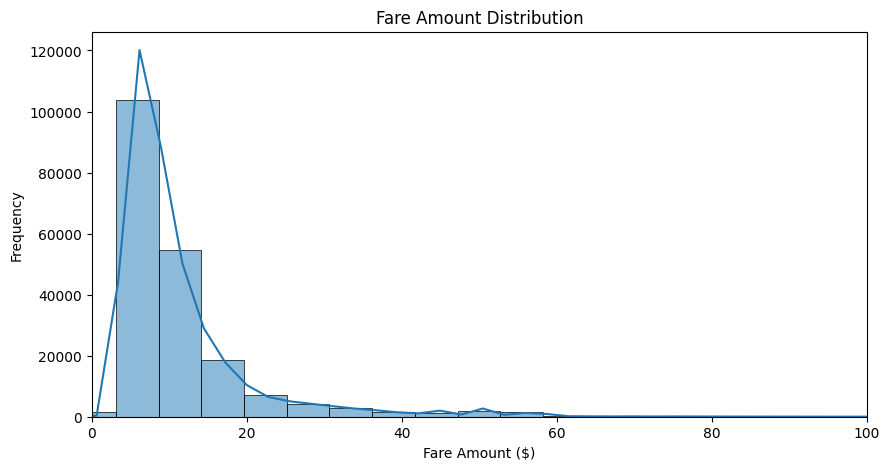

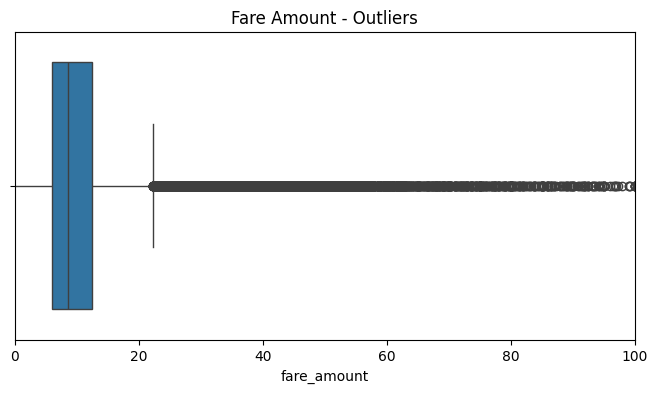

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fare distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['fare_amount'], bins=100, kde=True)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fare_amount'])
plt.title('Fare Amount - Outliers')
plt.xlim(0, 100)
plt.show()



In [5]:
# Convert to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Extract time-based features
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek


In [6]:
# Remove negative and extremely high fares
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 100)]


In [7]:
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]


In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df = df.dropna(subset=['pickup_datetime'])  # drop rows with invalid datetime


In [9]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.day_name()


In [10]:
df.to_csv("uber_cleaned.csv", index=False)


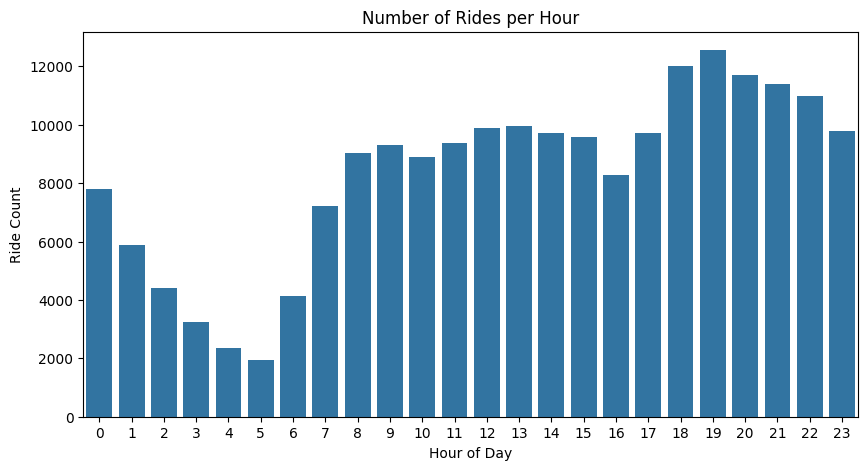

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df)
plt.title('Number of Rides per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Ride Count')
plt.show()


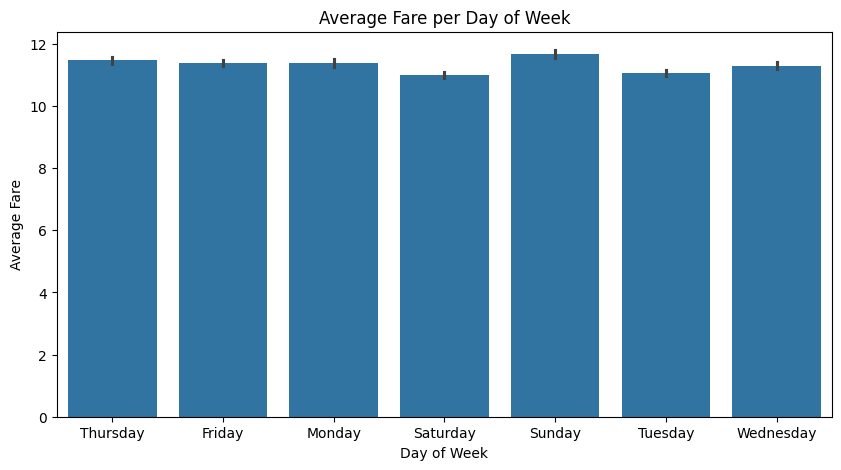

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='fare_amount', data=df)
plt.title('Average Fare per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare')
plt.show()


In [13]:
df.to_csv("uber_cleaned.csv", index=False)
